In [323]:
# Importing all the necessary packages

    # for data extraction 
import requests
import json
    # for data manupulations
import pandas as pd
from pandas import json_normalize
    # for ploting
import matplotlib.pyplot as plt
    # for removing warnings
import warnings 
warnings.filterwarnings('ignore')

## Data Extraction

In [324]:
# Function to extract data from The Graph using api

def extract(skip_val):
    url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2"
    query = """query swaps{
      swaps(first: 1000,skip:"""+str(skip_val)+""",orderBy: timestamp, orderDirection: desc, where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}) {
        pair{
        id
        }
        timestamp
        amount0In
        amount1In
        amount0Out
        amount1Out
        pair {
          token0 {
            symbol
            totalLiquidity
          }
          token1 {
            symbol
            totalLiquidity
          }

        }
        amountUSD

      }
    }

    """
    
    read = requests.post(url, json={'query':query})
    json_data = json.loads(read.text)
    
    # Normalising the json data, such that it can be converted into a pandas data frame.
    json_data = json_data['data']
    json_data = json_data['swaps']
    df = json_normalize(json_data)
    return df

In [325]:
# Extracting the first 1000 records
df = extract(0)

# Extracting another 4000 records, a total of 5000 records
for i in range(1000,5000,1000):
    df = df.append(extract(i))

In [326]:
df.head(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity
0,1179.63822333850042143,0,0,10.286133221639822362,19347.86204610714802749228661295065,1624397967,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
1,5234.634476002504842526,0,0,45.801716805273520348,86637.06949542820773925900662870611,1624397734,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
2,767.786520948315076713,0,0,6.700520206938424407,12674.49072470589326047843176082149,1624397734,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
3,2000,0,0,17.554261706218995873,33387.12636779043388831962302718486,1624397367,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
4,4.497056080849067448,0,0,0.039505451032102046,75.32004455091559699911989290678329,1624397274,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564


## Data Manipulation

In [327]:
# Reseting the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.tail(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity
4995,0,555.440952014030176471,5.373806795999199492,0,13931.96781019220947484321410381511,1623287797,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
4996,0,383.528905831568096118,3.709097919370109991,0,9616.717093210835233893634524389536,1623287772,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
4997,0,618.78299940756130575,5.981674978228438826,0,15495.3698100256385667367563283944,1623287616,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
4998,0,445.434931568132661768,4.303993733552520961,0,11144.25492886256527781776898594255,1623287605,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564
4999,0,508.267252898982592087,4.909111044073123143,0,12711.03040565845145013778138153046,1623287576,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564


In [328]:
# Converting timestamp into Date Time format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [329]:
# Creating a column for side(Buy/Sell)
    # amount0In and amount0Out -> represents UNI
    # amount1In and amount1Out -> represents WETH
        # if amount0In is 0 and amount0Out has some value, it means that UNI is sent out of the wallet, i.e. Sell
        # if amount0Out is 0 and amount0In has some value. it means that UNI is recived to the wallet, i.e. Buy  

df['side'] = ["Sell" if float(x)==0 else "Buy" for x in df['amount0In']]

In [330]:
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side
0,1179.63822333850042143,0,0,10.286133221639822362,19347.86204610714802749228661295065,2021-06-22 21:39:27,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564,Buy
1,5234.634476002504842526,0,0,45.801716805273520348,86637.06949542820773925900662870611,2021-06-22 21:35:34,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564,Buy


In [331]:
# converting
    # amount0In
    # amount1In
    # pair.token0.symbol
        # into "Base curency quantity traded" format

# Eg
    # amount0In/amount0Out UNI
    # 115.82195 UNI    -> rounded off to 5 decimals  -> it is not appropriate to round off a digital currency
    
b_c = df['amount0In']+df['amount0Out']
b_c = [round(float(i),5) for i in b_c]
b_c = [(str(i)+" "+str(df['pair.token0.symbol'][0])) for i in b_c]
df["baseCurrency"] = b_c

q_o = df['amount1In']+df['amount1Out']
q_o = [round(float(i),5) for i in q_o]
q_o = [(str(i)+" "+str(df['pair.token1.symbol'][0])) for i in q_o]
df["quoteCurrency"] = q_o

df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency
0,1179.63822333850042143,0,0,10.286133221639822362,19347.86204610714802749228661295065,2021-06-22 21:39:27,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564,Buy,1179.63822 UNI,10.28613 WETH
1,5234.634476002504842526,0,0,45.801716805273520348,86637.06949542820773925900662870611,2021-06-22 21:35:34,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2351274.393063227848458547,WETH,751778.640617383189345564,Buy,5234.63448 UNI,45.80172 WETH


In [332]:
# Creating a new column for total liquidity
df['pair.token1.totalLiquidity'] = pd.to_numeric(df['pair.token1.totalLiquidity'])
df['pair.token0.totalLiquidity'] = pd.to_numeric(df['pair.token0.totalLiquidity'])
df['totalLiquidity'] = round(df['pair.token1.totalLiquidity']+df['pair.token0.totalLiquidity'],5)
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency,totalLiquidity
0,1179.63822333850042143,0,0,10.286133221639822362,19347.86204610714802749228661295065,2021-06-22 21:39:27,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.351274e+06,WETH,751778.640617,Buy,1179.63822 UNI,10.28613 WETH,3.103053e+06
1,5234.634476002504842526,0,0,45.801716805273520348,86637.06949542820773925900662870611,2021-06-22 21:35:34,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.351274e+06,WETH,751778.640617,Buy,5234.63448 UNI,45.80172 WETH,3.103053e+06


In [333]:
# Rounding off USD to 5 decimals (Not to be done for real time works)
df['amountUSD'] =round (pd.to_numeric(df['amountUSD']),5)
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency,totalLiquidity
0,1179.63822333850042143,0,0,10.286133221639822362,19347.86205,2021-06-22 21:39:27,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.351274e+06,WETH,751778.640617,Buy,1179.63822 UNI,10.28613 WETH,3.103053e+06
1,5234.634476002504842526,0,0,45.801716805273520348,86637.06950,2021-06-22 21:35:34,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.351274e+06,WETH,751778.640617,Buy,5234.63448 UNI,45.80172 WETH,3.103053e+06


In [334]:
# Removing excess columns
df.drop(['amount0In','amount0Out','amount1In','amount1Out','pair.token0.symbol','pair.token1.symbol','pair.token1.totalLiquidity','pair.token0.totalLiquidity'],axis=1,inplace=True)
df.head(2)

,amountUSD,timestamp,pair.id,side,baseCurrency,quoteCurrency,totalLiquidity
0,19347.86205,2021-06-22 21:39:27,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,1179.63822 UNI,10.28613 WETH,3.103053e+06
1,86637.06950,2021-06-22 21:35:34,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,5234.63448 UNI,45.80172 WETH,3.103053e+06


In [335]:
# Re-naming columns
df.rename({'amountUSD': 'volumeUSD', 'pair.id': 'poolId'}, axis=1, inplace=True)
df.head(2)

,volumeUSD,timestamp,poolId,side,baseCurrency,quoteCurrency,totalLiquidity
0,19347.86205,2021-06-22 21:39:27,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,1179.63822 UNI,10.28613 WETH,3.103053e+06
1,86637.06950,2021-06-22 21:35:34,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,5234.63448 UNI,45.80172 WETH,3.103053e+06


In [336]:
# Re-arranging the columns
df = df[['timestamp', 'side', 'baseCurrency', 'quoteCurrency', 'volumeUSD','totalLiquidity','poolId']]
df.head()

,timestamp,side,baseCurrency,quoteCurrency,volumeUSD,totalLiquidity,poolId
0,2021-06-22 21:39:27,Buy,1179.63822 UNI,10.28613 WETH,19347.86205,3.103053e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
1,2021-06-22 21:35:34,Buy,5234.63448 UNI,45.80172 WETH,86637.06950,3.103053e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
2,2021-06-22 21:35:34,Buy,767.78652 UNI,6.70052 WETH,12674.49072,3.103053e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
3,2021-06-22 21:29:27,Buy,20000.0 UNI,17.55426 WETH,33387.12637,3.103053e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
4,2021-06-22 21:27:54,Buy,4.49706 UNI,0.03951 WETH,75.32004,3.103053e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17


## Initial Analysis

In [337]:
# Checking the range of dates
start_date = df.iloc[0]['timestamp']
end_date = df.iloc[-1]['timestamp']
print("The Data ranges between the date "+str(end_date)+" to "+str(start_date))

The Data ranges between the date 2021-06-10 01:12:56 to 2021-06-22 21:39:27


In [338]:
# Number of Buy and Sell transactions in the given period
df['side'].value_counts()

Buy     2912
Sell    2088
Name: side, dtype: int64

Text(0.5,1,'Number of transactions done on each day')

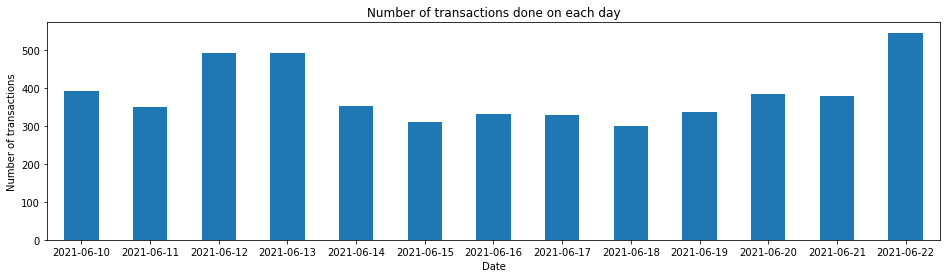

In [339]:
fig, axs = plt.subplots(figsize=(16, 4))

df.groupby(df["timestamp"].dt.date)["timestamp"].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Date")
plt.ylabel("Number of transactions")
plt.title("Number of transactions done on each day")

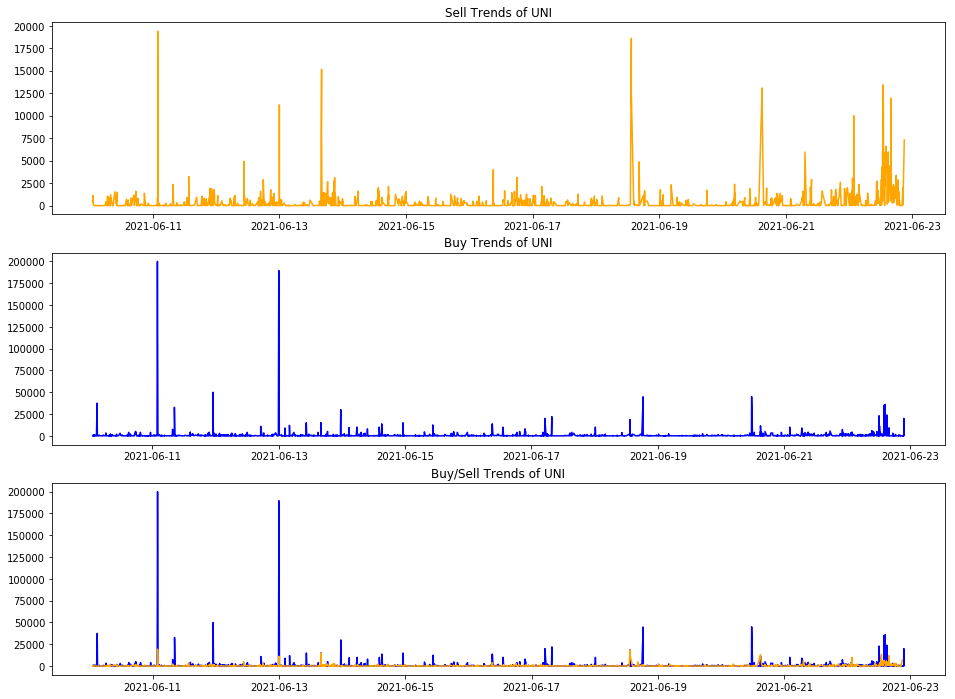

In [340]:
# since we converted base curency and quote curency to strings, for adding the type of token next to its value.
# we can create a different dataframe, for further analysis

temp = [i for i in df['baseCurrency']]
b_c=[]
for i in temp:
    b_c.append(float(i.split(" ")[0]))
    
UNI_ = df[['timestamp','side']]
UNI_['UNI_QTY'] = b_c
UNI_.head(5)

uni_sell = UNI_[UNI_['side']=='Sell']
uni_buy = UNI_[UNI_['side']=='Buy']


fig, axs = plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.plot(uni_sell['timestamp'], uni_sell['UNI_QTY'],color='orange') 
plt.title("Sell Trends of UNI")
plt.subplot(312)
plt.plot(uni_buy['timestamp'], uni_buy['UNI_QTY'],color='blue')
plt.title("Buy Trends of UNI")
plt.subplot(313)
plt.plot(uni_buy['timestamp'], uni_buy['UNI_QTY'],color='blue')
plt.plot(uni_sell['timestamp'], uni_sell['UNI_QTY'],color='orange') 
plt.title("Buy/Sell Trends of UNI")
plt.show() 


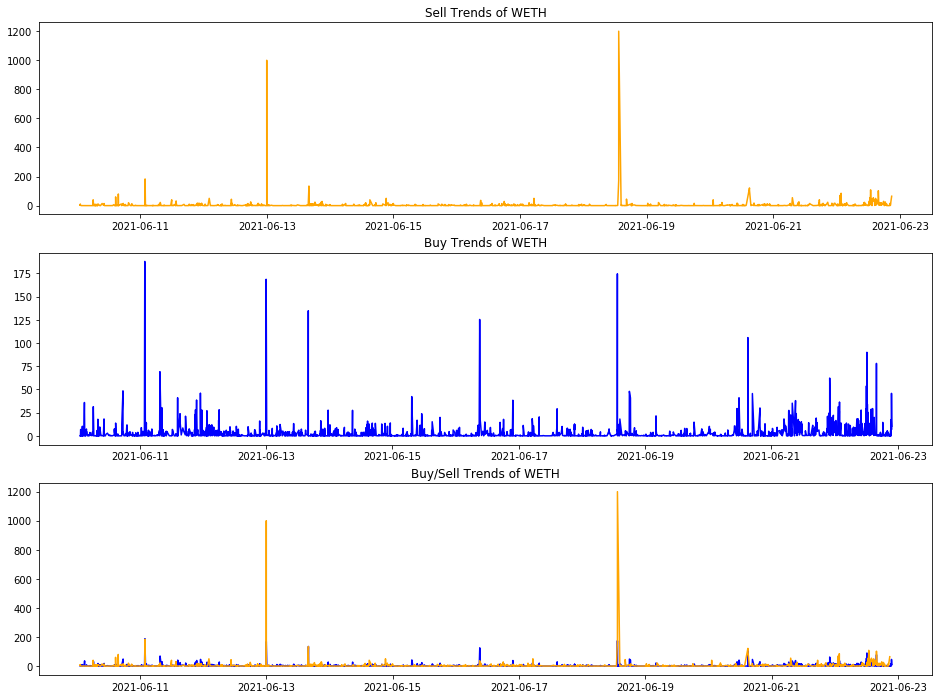

In [341]:
# since we converted base curency and quote curency to strings, for adding the type of token next to its value.
# we can create a different dataframe, for further analysis

temp = [i for i in df['quoteCurrency']]
b_c=[]
for i in temp:
    b_c.append(float(i.split(" ")[0]))
    
WETH_ = df[['timestamp','side']]
WETH_['UNI_QTY'] = b_c
WETH_.head(5)

weth_sell = WETH_[WETH_['side']=='Sell']
weth_buy = WETH_[WETH_['side']=='Buy']


fig, axs = plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.plot(uni_sell['timestamp'], weth_sell['UNI_QTY'],color='orange') 
plt.title("Sell Trends of WETH")
plt.subplot(312)
plt.plot(uni_buy['timestamp'], weth_buy['UNI_QTY'],color='blue')
plt.title("Buy Trends of WETH")
plt.subplot(313)
plt.plot(uni_buy['timestamp'], weth_buy['UNI_QTY'],color='blue')
plt.plot(uni_sell['timestamp'], weth_sell['UNI_QTY'],color='orange') 
plt.title("Buy/Sell Trends of WETH")
plt.show() 